# Projeto "Custos Médicos"



In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings('ignore')

sns.set_style()
%matplotlib inline


In [14]:
# Importando o arquivo como df
df = pd.read_csv('insurance.csv')

# Lendo as primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Dicionário das colunas:**

- `age`: idade de cada consumidor do seguro;

- `sex`: sexo do consumidor;

- `bmi`: *body mass index*. No Brasil, é o índice de massa corpórea, **IMC**;

- `children`: se o consumidor tem filhos ou não;

- `smoker`: se o consumidor fuma ou não;

- `region`: região que o consumidor mora;

- `charges`: custos que o consumidor teve/tem com o seguro de saúde.

In [3]:
# Shape do dataset
print(f"Variáveis: {df.shape[1]}\nDados inseridos: {df.shape[0]}")

Variáveis: 7
Dados inseridos: 1338


In [4]:
# Verificando quantos dados nulos existem
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A célula anterior nos mostrou que não existem valores nulos no nosso conjunto de dados. Para ficar mais fácil, vamos renomear as colunas

In [15]:
df.rename(columns={'age': 'idade', 'sex': 'sexo', 'bmi': 'imc', 'children': 'filhos', 'smoker': 'fumante', 'region': 'regiao', 'charges': 'custos'}, inplace=True)

In [8]:
# Visualizando o tipo dos dados
print(df.dtypes)

# Visualizando DataFrame
df

idade        int64
sexo        object
imc        float64
filhos       int64
fumante     object
regiao      object
custos     float64
dtype: object


,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Como as colunas `sexo` e `fumante` só possuem apenas **dois valores** (female ou male e yes ou no, respectivamente), portanto podemos transformar os dados da seguinte forma:

- female = 1

- male = 0

- fumante = 1

- não fumante = 0


In [18]:
# Convertendo primeiro a coluna sexo
df['sexo'].replace(['male', 'female'], [0,1], inplace=True)

# Convertendo a coluna fumante
df['fumante'].replace(['no', 'yes'], [0, 1], inplace=True)

# Visualizando o df
df.head()

,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


### Hipótese 1: fumantes arcam com mais despesas médicas do que não fumantes.

Queremos verificar se existe correlação entre pessoas que fumam e o custo em despesas médicas. Se essa correlação existe, ela é perfeita?


Antes de partirmos diretamente para o código, precisamos fazer uma reflexão estatística antes. A variável **`fumante`**, embora tenha como valor `1` ou `0` (*números, concorda?*), ela é categórica. Ora, lembra que demos um `replace` para os valores de `male` e `female`, em que ficou `0` e `1`, respectivamente? Estes números, embora números, têm significados categóricos.

Já a variável **`custos`** é numérica (suponho que não exista dúvidas quanto a isso).

**Qual a implicação disso?**

A implicação é: **precisamos calcular a correlação que permita ser atribuída em uma variável categórica e uma numérica.**

---
#### Se você não sabe o que é correlação...

**Correlação** é o quanto e como duas variáveis estão relacionadas. Estatisticamente, quer dizer o quanto uma variável está **associada** a outra. Também quer dizer que é linear, uma variável cresce (ou decresce) uma quantidade fixa em relação a outra. O **grau de correlação** é um escalar $ 0 < corr < 1 $ que mede **quão** as variáveis estão correlacionadas (se estiverem, rs). 

Com a imagem abaixo, eu simplifico os tipos de correlação e os seus valores.


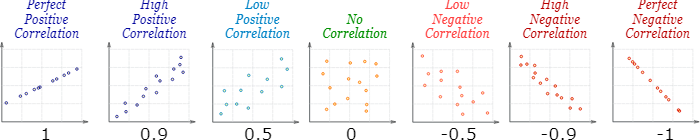




---

Eu estou lhe explicando essa situação, porque ao fazer este trabalho eu fiquei em dúvida também. Se você é iniciante como eu, não se preocupe, pois estamos no mesmo barco!

Pesquisando na literatura (vide *stackoverflow* e correlatos) sobre a resolução de problemas como esse, encontrei o coeficiente de correção Point-Biserial cujo as propriedades permitem calcular o coeficiente de correlação entre uma variável binária (0 ou 1) e uma variável numérica. A biblioteca `SciPy` permite tal implementação, de acordo com o código abaixo:

```
from scipy import stats

stats.pointbiserialr(x, y)
```

Ela retorna uma tupla `(correlation = , pvalue = )`.

Uma curiosidade é que usando o que usei antes:

```
correlation = df[['fumante', 'custos']].corr(method='pearson')
```
os resultados foram bem próximos. O primeiro deu `0.7872` e o segundo deu `0.79`.

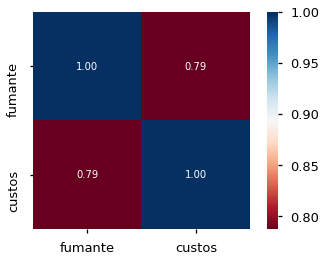

In [28]:
# Verificando correlacao
correlation = df[['fumante', 'custos']].corr(method='pearson')

sns.heatmap(correlation, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Dado a explicação anterior e o gráfico de calor, podemos concluir que **existe uma correlação positiva entre fumantes e custos médicos, de tal forma que quem fuma finda tendo maiores custos com despesas médicas**.

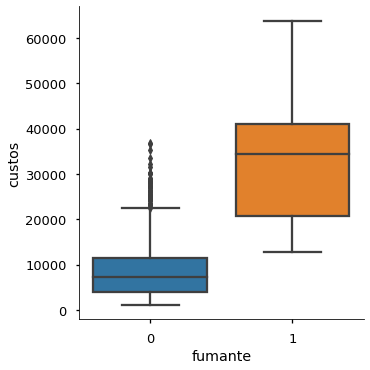

In [30]:
# Plotando scatter plot
sns.catplot(x=df.fumante, y=df.custos, kind='box', data=df);